## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre processing

### Fetch data

In [3]:
data=pd.read_csv('/home/nailsonseat/Desktop/Datasets/dataset_sunny.csv')
data

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
labels=data.columns.to_numpy()
data=data.to_numpy().T

### Extract training and test data

In [5]:
print(data.shape)

(5, 14)


In [6]:
def dataSplit(data,fraction):
    indices=np.arange(data.shape[1])
    np.random.shuffle(indices)
    data=data[:,indices]
    length=data.shape[1]-int(data.shape[1]*fraction)
    indices=np.arange(length)
    train,train_labels=data[:-1,:length],data[-1,:length]
    test,test_labels=data[:-1,length:],data[-1,length:]
    return train,train_labels,test,test_labels
    

In [7]:
X,Y,X_t,Y_t=dataSplit(data,0.3)
print(Y)
pd.DataFrame(X)


['yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes']


,0,1,2,3,4,5,6,7,8,9
0,sunny,overcast,overcast,sunny,sunny,sunny,rainy,rainy,rainy,rainy
1,mild,cool,hot,cool,hot,mild,mild,cool,mild,mild
2,normal,normal,high,normal,high,high,normal,normal,high,high
3,True,True,False,False,True,False,False,False,True,False


### Print shapes

In [8]:
print(X.shape)
print(Y.shape)
print(labels)

(4, 10)
(10,)
['Outlook' 'Temperature' 'Humidity' 'Windy' 'Play']


## Naive Bayes

### Frequency function

In [9]:
def frequency(data,labels):
    frequency={}
    for i in range(len(data)):
        for j in range(len(data[i])):
            label=labels[i]+' '+str(data[i,j])
            if label not in frequency:
                frequency[label]=1
            else:
                frequency[label]+=1
    return list(frequency.items())

### Histogram for affecting factors vs frequency days

In [10]:
def histogram(data,title,x_label,y_label):  
    fig = plt.figure(figsize = (20, 5))
    labels=[]
    values=[]
    for i in range(len(data)):
            labels.append(data[i][0])
            values.append(data[i][1])
    plt.bar(labels,values, color ='blue',
            width = 0.2)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Frequency Plot for Playable days

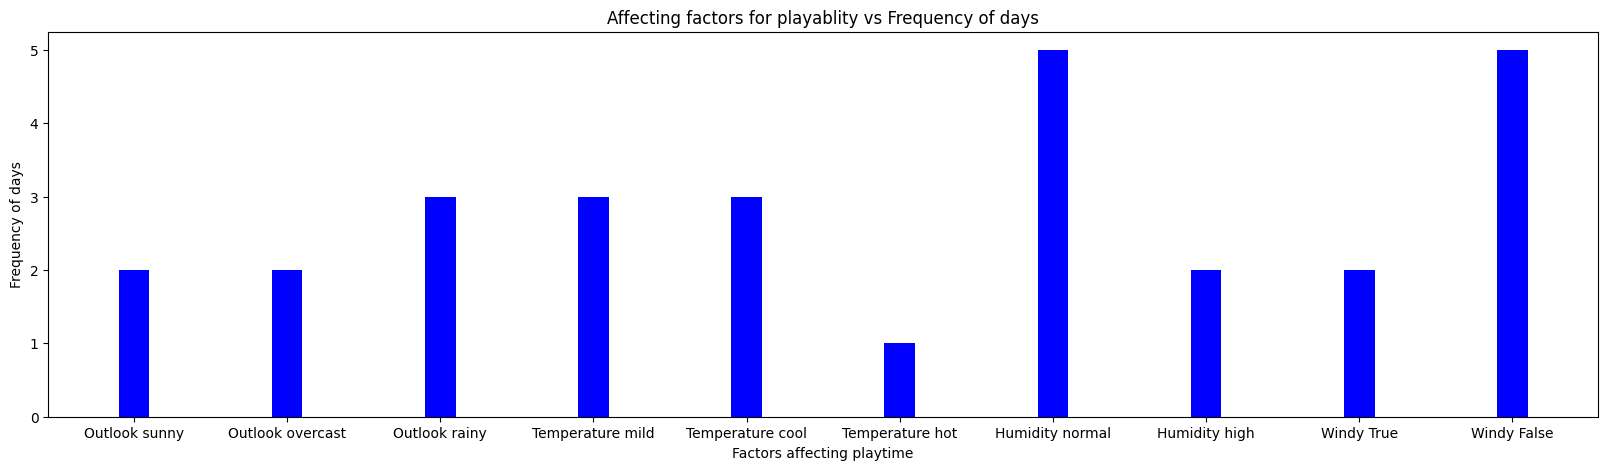

In [11]:
indices=np.where(Y=='yes')[0]
frequencies_playable=frequency(X[:,indices],labels)
histogram(frequencies_playable,"Affecting factors for playablity vs Frequency of days","Factors affecting playtime","Frequency of days")

### Frequency Plot for Non - Playable days

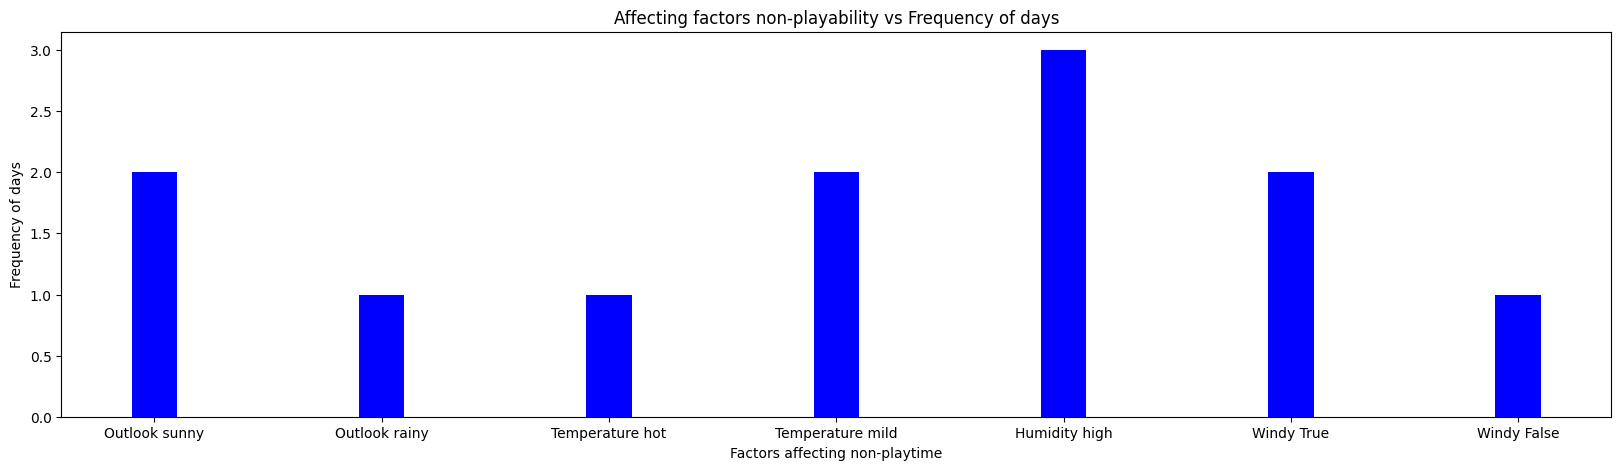

In [12]:
indices=np.where(Y=='no')[0]
frequencies_non_playable=frequency(X[:,indices],labels)
histogram(frequencies_non_playable,"Affecting factors non-playability vs Frequency of days","Factors affecting non-playtime","Frequency of days")

### Prior probabilities

In [13]:
count={}
for i in Y:
    try:
        count[i]+=1
    except KeyError:
        count[i]=1
count

{'yes': 7, 'no': 3}

In [14]:
prior_playability=count['yes']/(count['yes']+count['no'])
prior_playability

0.7

In [15]:
prior_non_playability=count['no']/(count['yes']+count['no'])
prior_non_playability

0.3

### Playable features probability

In [16]:
frequencies_playable=np.array(frequencies_playable)
frequencies_playable

array([['Outlook sunny', '2'],
       ['Outlook overcast', '2'],
       ['Outlook rainy', '3'],
       ['Temperature mild', '3'],
       ['Temperature cool', '3'],
       ['Temperature hot', '1'],
       ['Humidity normal', '5'],
       ['Humidity high', '2'],
       ['Windy True', '2'],
       ['Windy False', '5']], dtype='<U21')

In [17]:
playable_feature_probability={}
for i in range(len(frequencies_playable)):
    playable_feature_probability[frequencies_playable[i,0]]=int(frequencies_playable[i,1])/sum([int(x) for x in frequencies_playable[:,1]])

In [22]:
playable_feature_probability

0

### Non-playable features probability